In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
df = pd.read_csv("train.csv")

print("✅ Data Loaded Successfully!")
df.head()


✅ Data Loaded Successfully!


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1.0,BABY CARE,0.0,0.0
2,2,2013-01-01,1.0,BEAUTY,0.0,0.0
3,3,2013-01-01,1.0,BEVERAGES,0.0,0.0
4,4,2013-01-01,1.0,BOOKS,0.0,0.0


In [8]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract useful time-based features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek

# Handle missing values
# Replace missing numeric values with 0
df['onpromotion'] = df['onpromotion'].fillna(0)

# Drop rows where date or sales is missing
df = df.dropna(subset=['date', 'sales'])

print("✅ Missing values handled successfully!")
print(df.isnull().sum())
df.head()


✅ Missing values handled successfully!
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
year           0
month          0
day            0
dayofweek      0
dtype: int64


,id,date,store_nbr,family,sales,onpromotion,year,month,day,dayofweek
0,0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,2013.0,1.0,1.0,1.0
1,1,2013-01-01,1.0,BABY CARE,0.0,0.0,2013.0,1.0,1.0,1.0
2,2,2013-01-01,1.0,BEAUTY,0.0,0.0,2013.0,1.0,1.0,1.0
3,3,2013-01-01,1.0,BEVERAGES,0.0,0.0,2013.0,1.0,1.0,1.0
4,4,2013-01-01,1.0,BOOKS,0.0,0.0,2013.0,1.0,1.0,1.0


In [9]:
# Select features for regression
features = ['year', 'month', 'day', 'dayofweek', 'onpromotion']
target = 'sales'

X = df[features]
y = df[target]

# Double-check if any NaN still exists
print("🔍 Checking for NaN in features:", X.isnull().sum().sum())

if X.isnull().sum().sum() > 0:
    X = X.fillna(0)
    print("⚙️ Filled remaining NaN values with 0")

print("✅ Feature matrix (X) and target (y) are clean and ready!")
X.head()


🔍 Checking for NaN in features: 0
✅ Feature matrix (X) and target (y) are clean and ready!


,year,month,day,dayofweek,onpromotion
0,2013.0,1.0,1.0,1.0,0.0
1,2013.0,1.0,1.0,1.0,0.0
2,2013.0,1.0,1.0,1.0,0.0
3,2013.0,1.0,1.0,1.0,0.0
4,2013.0,1.0,1.0,1.0,0.0


In [11]:
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 43762
Testing samples: 10941


In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Linear Regression Model Trained Successfully!")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


✅ Linear Regression Model Trained Successfully!
Coefficients: [ 0.00000000e+00  1.77635684e-15 -9.53021383e-01  1.70365093e+01
  0.00000000e+00]
Intercept: 151.5921470839774


In [13]:
y_pred = model.predict(X_test)

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head(10)


,Actual,Predicted
24460,1523.0,138.249848
15159,2264.0,177.087973
8745,10.0,232.009587
50751,0.0,140.991036
15714,0.0,177.087973
34453,0.0,234.750775
19740,0.0,225.338437
27953,0.0,170.416824
41414,0.0,179.829162
38042,0.0,147.662186


In [14]:
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print("📊 Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


📊 Model Evaluation Metrics:
Mean Absolute Error (MAE): 283.27
Mean Squared Error (MSE): 424583.97
Root Mean Squared Error (RMSE): 651.60
R² Score: 0.00


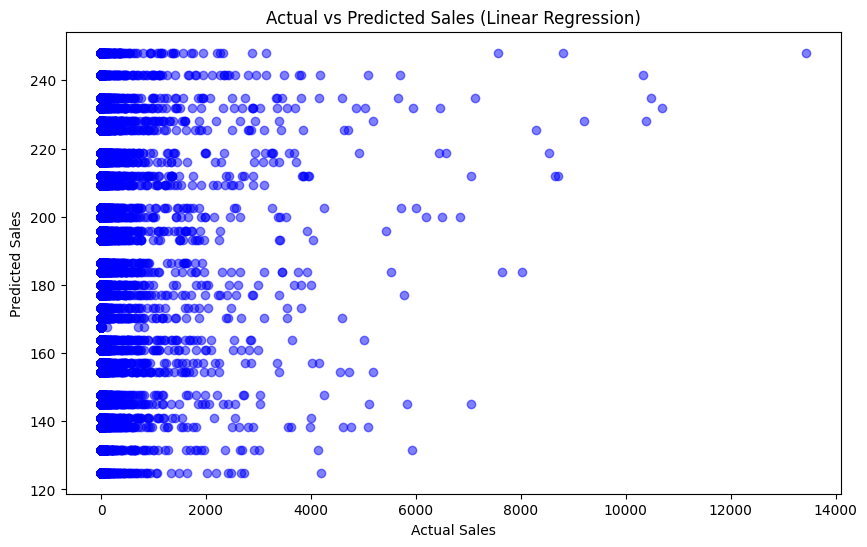

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Linear Regression)")
plt.show()
